<a href="https://colab.research.google.com/github/wasonganelson/ds/blob/master/data_wrangling_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data analysis in python is made possible through pre-processing libraries(native python, numpy, pandas, scipy), visualization libraries(matplotlib, seaborn, bokeh) and machine learning libraries(sci-kit learn, tensorflow)

Analysis of data can be grouped into four main stages; data wrangling, exploratory data analysis, model development, model evaluation.

In data wrangling
 - we'll cover dealing with missing data
 - changing data format
 - data normalization
 - data binning
 - data encoding ... from text to numerics

data wrangling is necessary as original data format might not be in a manner that enables ease of analysis

['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,price-bin,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,medium,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,medium,0,1


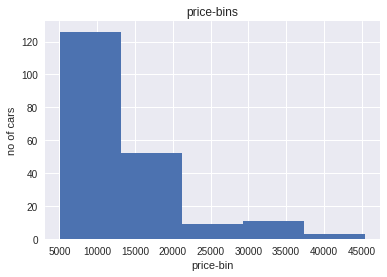

In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot

# DEALING WITH MISSING DATA

# data source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# define headers to be used with data, data from source has no headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# read data and store in pandas dataframe
df = pd.read_csv(data, names = headers)

# view data statistics
df.describe(include='all')

# view data sample
df.head()

# from the data sample above, we note '?' values are used to identify missing values
# we'll replace '?' with python's default missing value identifier NaN
# below is same as ... df.replace('?', np.nan, inplace = True)
df = df.replace('?', np.nan)

# create a dataframe where nan values are stored as boolean True
missing_values = df.isnull()

# we can now loop through the missing_value dataframe to identify number of nan/ True values in every column
columns_with_missing_values = []
for column in missing_values:
  if True in missing_values[column].values:
    columns_with_missing_values.append(column)

# we now have column names with nan values/ missing data
print(columns_with_missing_values)

# replace nan values in the original dataframe with mean, mode value where appropriate
# get mean using mean() and mode using value_counts().idxmax()
# drop price row with nan value as price is a value we intend to predict later on
# use axis=0 to drop row, axis=1 to drop column
df['normalized-losses'].replace(np.nan, df['normalized-losses'].astype('float').mean(), inplace = True)
df['bore'].replace(np.nan, df['bore'].astype('float').mean(), inplace = True)
df['stroke'].replace(np.nan, df['stroke'].astype('float').mean(), inplace = True)
df['horsepower'].replace(np.nan, df['horsepower'].astype('float').mean(), inplace = True)
df['peak-rpm'].replace(np.nan, df['peak-rpm'].astype('float').mean(), inplace = True)
df['num-of-doors'].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace = True)
df.dropna(subset = ['price'], axis = 0, inplace = True)

# reset index, because we droped two rows ... original index is dropped as well
df.reset_index(drop = True, inplace = True)

# DATA FORMATTING

# data has to be in correct format to avoid abnormal behaviour with models to be built
#use astype() method to change column dtypes
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype('float') 

# DATA STANDARDIZATION

# in some instances, you might have to change data into standard format
# most so when data is from disparate sources i.e from m/s to km/h
# for our case, lets convert city-mpg to city-L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df['city-mpg']
# change highway-mpg to highway-L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace = True)

# DATA NORMALIZATION

# normalization aims to scale values of several variables to similar range
# this is to prevent one variable from having undue/ disproportionate influence on a model
# normalization can be through simple feature scaling, min-max scaling, z-score scaling
# simple feature scaling is most common ... x/x~max
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[['length','width','height']].head()

# DATA BINNING

# binning is done where we want to do grouped analysis
# we convert continuous numerical variables into categorical bins/ groups
# appropriate for variable with many unique numerical values i.e price
binwidth  = (df['price'].max() - df['price'].min())/4
bins = np.arange(df['price'].min(), df['price'].max(), binwidth)
bin_label = ['low', 'medium', 'high']
df['price-bin'] = pd.cut(df['price'], bins, labels=bin_label)
df[['price', 'price-bin']].head()

# draw historgram of 'price' with bins = any number
plt.pyplot.hist(df['price'], bins = 5)
# set x/y labels and plot title
plt.pyplot.xlabel('price-bin')
plt.pyplot.ylabel('no of cars')
plt.pyplot.title('price-bins')

# DUMMY/ INDICATOR VARIABLES

# indicator variables are useful where non-numeric values will be used as inputs to a model
# the non-numerics will be coded to numerics
dumy_df = pd.get_dummies(df['fuel-type'])
# merge dummy_df to df
df = pd.concat([df, dumy_df], axis = 1)
# drop fuel-type column
df.drop("fuel-type", axis = 1, inplace=True)
df.head()




